![title](Expression.png)

## RNA-seq

![title](RNA-seq1.png) 

![title](RNA-seq2.png) 

In [72]:
# Игрушечный датасет с экспрессией
import numpy as np

starts = [11869, 14404, 17369, 29554, 30366, 34554, 52473, 57598, 65419, 
          89295] 
stops = [14409, 29570, 17436, 31109, 30503, 36081, 53312, 64116, 71585, 
         133723] 
expr_normal = [63, 22, 30, 44, 18, 21, 17, np.nan, np.nan, 295] # в ридах
expr_cancer = [119, np.nan, 71, 96, 34, 14, 190, 60, 11, np.nan] 

In [3]:
np.set_printoptions(suppress=True)

Надо бы поделить количество ридов на длины генов 

## Как посчитать длины генов?

In [5]:
big_starts, big_stops = starts * 1000, stops * 1000

In [6]:
%%timeit
# Новичковое решение
lengths = list()
for ind in range(len(big_starts)):
    lengths.append(big_stops[ind] - big_starts[ind] + 1)

The slowest run took 5.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.1 ms per loop


In [7]:
%%timeit
# Норм питоновское решение
lengths = [stop - start + 1
           for stop, start in zip(big_stops, big_starts)]

1000 loops, best of 3: 794 µs per loop


## А можно ещё быстрее и читаемее?

In [8]:
import numpy as np
big_starts_arr = np.array(big_starts)
big_stops_arr = np.array(big_stops)

In [9]:
%%timeit
# Решение через NumPy
lengths = big_stops_arr - big_starts_arr + 1

The slowest run took 1024.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.92 µs per loop


# Почему стоит использовать Numpy
## 1. Массивы Numpy работает в 10-100 раз быстрее
## 2. Все операции векторизованы!

# Базовый объект - ndarray

![title](n_dimensional.png)

### Как создать ndarray

In [10]:
# Из питоновского объекта
int_array = np.array([[1, 3, 5], [7, 9, 11]])
str_array = np.array(["milk", "promoter", "bacon", "exon"])
print(int_array)

[[ 1  3  5]
 [ 7  9 11]]


In [12]:
# Аналог list(range(10))
np_range = np.arange(10)
print(np_range)

[0 1 2 3 4 5 6 7 8 9]


In [16]:
# Zeros, ones, full
zeros = np.zeros(shape=(2,))
ones = np.ones(shape=(4, 5, 4, 5))
fives = np.full(shape=(2, 5, 4), fill_value=5)
print(zeros)
print(ones)

[0. 0.]
[[[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[

In [17]:
# Like
zeros_like = np.zeros_like(int_array)
ones_like = np.ones_like(int_array)
fives_like = np.full_like(int_array, fill_value=5)
print(fives_like)

[[5 5 5]
 [5 5 5]]


## flatten, reshape

In [19]:
print(int_array)

[[ 1  3  5]
 [ 7  9 11]]


In [20]:
# flatten - метод массива
flat_array = int_array.flatten()
print(flat_array)

[ 1  3  5  7  9 11]


In [27]:
# reshape - функция в NumPy
reshaped_array = np.reshape(flat_array, newshape=(6, 1))
print(reshaped_array)

[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]]


In [196]:
# reshape - функция в NumPy
reshaped_array = np.reshape(int_array, newshape=(3, 2))
print(reshaped_array)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


## Обычно данные поставляются в виде таблиц

In [77]:
            #  start    stop   expr1   expr2 
gene_info = [[ 11869,  14409,     63,    119],
             [ 14404,  29570,     22, np.nan],
             [ 17369,  17436,     30,     71],
             [ 29554,  31109,     44,     96],
             [ 30366,  30503,     18,     34],
             [ 34554,  36081,     21,     14],
             [ 52473,  53312,     17,    190],
             [ 57598,  64116, np.nan,     60],
             [ 65419,  71585, np.nan,     11],
             [ 89295, 133723,    295, np.nan]]

In [47]:
gene_info_arr = np.array(gene_info)

In [48]:
# тип, размерность и форма
print(gene_info_arr.dtype, gene_info_arr.ndim, gene_info_arr.shape, sep="\n")

float64
2
(10, 4)


## Как получить строку таблицы?

In [49]:
# Из списка
fifth_gene = gene_info[4]
print(fifth_gene)

[30366, 30503, 18, 34]


In [50]:
# Из массива Numpy так же
fifth_gene = gene_info_arr[4]
print(fifth_gene)

[30366. 30503.    18.    34.]


## Как получить столбец?

In [51]:
# Из списка так себе
starts = list(zip(*gene_info))[0]
print(starts)

(11869, 14404, 17369, 29554, 30366, 34554, 52473, 57598, 65419, 89295)


In [78]:
# Зато из массива Numpy очень просто!
starts = gene_info_arr[:, 0]
print(starts)

[11869. 14404. 17369. 29554. 30366. 34554. 52473. 57598. 65419. 89295.]


## Как взять произвольный срез? 

In [53]:
# Экспрессия 1 и экспрессия 2 для 5 и 7 ген
print(gene_info_arr[4:7:2, 2:])

[[ 18.  34.]
 [ 17. 190.]]


In [54]:
            #  start    stop   expr1   expr2 
gene_info = [[ 11869,  14409,     63,    119],
             [ 14404,  29570,     22, np.nan],
             [ 17369,  17436,     30,     71],
             [ 29554,  31109,     44,     96],
             [ 30366,  30503,     18,     34],
             [ 34554,  36081,     21,     14],
             [ 52473,  53312,     17,    190],
             [ 57598,  64116, np.nan,     60],
             [ 65419,  71585, np.nan,     11],
             [ 89295, 133723,    295, np.nan]]

gene_info = np.array(gene_info)

## Как из числа ридов и длин генов получить RPKM?

Reads per kilobase per million

## Как посчитать длины генов?

В Numpy все операции векторизованы!

In [55]:
lengths = stops - starts + 1
print(lengths)
print(lengths ** (1/2))

[ 14347.  29549.  17407.  31066.  30486.  36061.  53296.     nan     nan
 133429.]
[119.77896309 171.8982257  131.93559035 176.25549637 174.60240548
 189.89734069 230.85926449          nan          nan 365.27934516]


Даже логические!

In [80]:
long_gene_ind = lengths > 1000
print(long_gene_ind)

[ True  True  True  True  True  True  True  True]


## Как взять только длинные гены?

Логическая индексация

In [81]:
long_gene_info = gene_info[long_gene_ind]
print(long_gene_info)

TypeError: only integer scalar arrays can be converted to a scalar index

In [67]:
lengths = lengths[long_gene_ind]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 10

In [68]:
starts, stops = long_gene_info[:, 0], long_gene_info[:, 1]
expr1, expr2 = long_gene_info[:, 2], long_gene_info[:, 3]

## Как избавиться от пропущенных значений?

In [222]:
np.nan == np.nan

False

![title](wtf.gif)

In [69]:
print(expr1 == np.nan)
print(expr1)
print(expr2)

[False False False False False False False False]
[ 63.  22.  30.  44.  18.  21.  17. 295.]
[119.  nan  71.  96.  34.  14. 190.  nan]


In [61]:
def nan_to_mean(arr):
    nan_ind = np.isnan(arr)
    arr[nan_ind] = np.mean(arr[~nan_ind])

In [62]:
nan_to_mean(expr1)
nan_to_mean(expr2)

In [63]:
print(expr2)

[119.          87.33333333  71.          96.          34.
  14.         190.          87.33333333]


## При взятии срезов данные не копируются, срез указывает на тот же объект в памяти!

In [228]:
print(long_gene_info)

[[ 11869.  14409.     63.    119.]
 [ 14404.  29570.     22.     60.]
 [ 29554.  31109.     44.     96.]
 [ 34554.  36081.     21.     14.]
 [ 57598.  64116.     89.     60.]
 [ 65419.  71585.     89.     11.]
 [ 89295. 133723.    295.     60.]]


## Но при логической индексации данные копируются.

In [229]:
print(gene_info)

[[ 11869.  14409.     63.    119.]
 [ 14404.  29570.     22.     nan]
 [ 17369.  17436.     30.     71.]
 [ 29554.  31109.     44.     96.]
 [ 30366.  30503.     18.     34.]
 [ 34554.  36081.     21.     14.]
 [ 52473.  53312.     17.    190.]
 [ 57598.  64116.     nan     60.]
 [ 65419.  71585.     nan     11.]
 [ 89295. 133723.    295.     nan]]


## Ура, можно считать RPKM!

In [230]:
def get_rpkms(lengths, reads):
    rpms = reads * (1000000 / np.sum(reads))
    rpkms = rpms * (1000 / lengths)
    return rpkms

In [231]:
rpkms1 = get_rpkms(lengths, expr1)
rpkms2 = get_rpkms(lengths, expr2)

In [232]:
print(rpkms1)
print(rpkms2)

[39796.7711553   2328.2786052  45389.4622174  22060.1211836
 21913.96577039 23164.77101624 10657.79668226]
[111504.6569592    9418.94526651 146896.80499449  21815.008726
  21913.96577039   4246.87468631   3215.40306685]


## Интерактом

![title](interactome.png)

## Давайте посмотрим на степеней вершин 

In [73]:
import igraph as ig # библиотека для работы с графами
import seaborn as sns # для визуализации
import matplotlib.pyplot as plt # тоже для визуализации

ModuleNotFoundError: No module named 'igraph'

In [74]:
%matplotlib notebook
import numpy as np

In [52]:
# Возьмём интерактом
interactome = ig.Graph.Read_Pickle("data/graph.pkl")

In [53]:
# Получим список степеней генов-вершин, преобразуем к массиву NumPy
degrees = np.array(interactome.degree(interactome.vs))

<IPython.core.display.Javascript object>


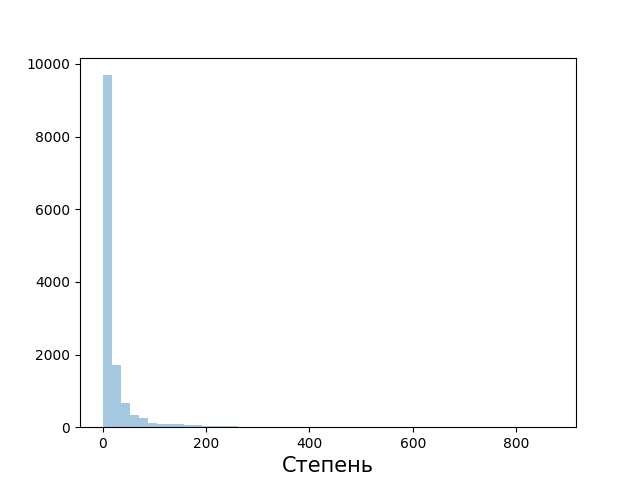

Text(0.5,0,'Степень')

In [62]:
sns.distplot(degrees, kde=False)
plt.xlabel("Степень", size=15)

Такое себе распределение

## Давайте попробуем построить распределение логарифмов степеней

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


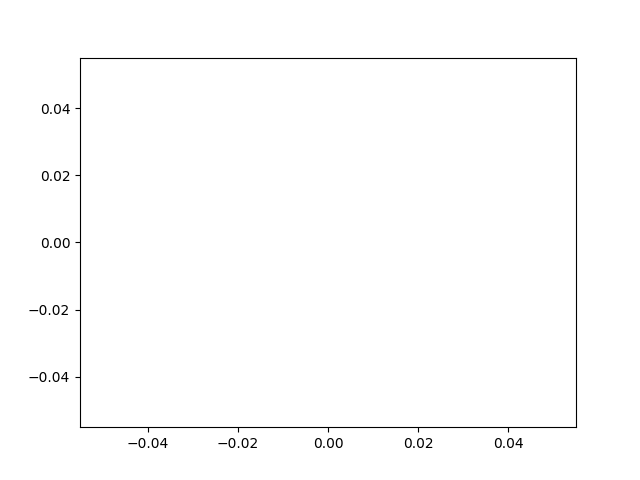

OverflowError: cannot convert float infinity to integer

In [63]:
sns.distplot(np.log(degrees), kde=False)

In [32]:
print(sum(degrees == 0)) # сколько вершин с нулевой степенью
print(len(degrees)) # сколько всего вершин

2
13372


<IPython.core.display.Javascript object>


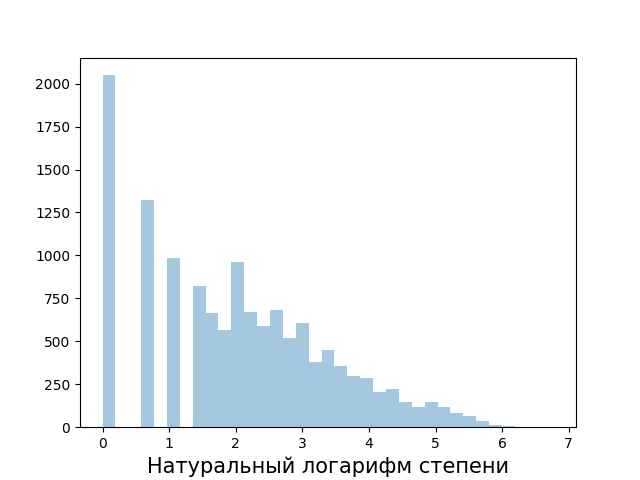

Text(0.5,0,'Натуральный логарифм степени')

In [61]:
degrees_nonzero = degrees[degrees != 0]
sns.distplot(np.log(degrees_nonzero), kde=False) # np.log - универсальная функция (ufunc) NumPy
plt.xlabel("Натуральный логарифм степени", size=15)

## Можно писать свои универсальные (векторизованные) функции

In [59]:
def nice_transformation(elm):
    return elm ** 2 if elm % 2 else elm / 3

nice_transformation = np.vectorize(nice_transformation)
print(nice_transformation(np.arange(10)))

[ 0.          1.          0.66666667  9.          1.33333333 25.
  2.         49.          2.66666667 81.        ]


# Ключевые моменты по NumPy

- NumPy работает быстро
- Не нужно циклов, всё векторизовано
- Индексы пишутся через запятую, можно логические индексы
- В первом случае NumPy не копирует данные, во втором - копирует
- Есть векторизованные функции, можно писать свои
- Для решения любой задачи найдётся набор функций NumPy
- Очень много библиотек использует NumPy

## Давайте возьмём реальный датасет!

In [75]:
import pandas as pd

In [110]:
gene_df = pd.read_csv("data/Homo_sapiens.GRCh38.91.gtf", comment="#", sep="\t", header=None)

In [36]:
gene_df.head(3)

,0,1,2,3,4,5,6,7,8
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g..."
1,1,havana,transcript,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."
2,1,havana,exon,11869,12227,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."


## Основные типы Pandas - Series и DataFrame

In [76]:
type(gene_df)

NameError: name 'gene_df' is not defined

In [38]:
gene_df.head(3)

NameError: name 'gene_df' is not defined

In [7]:
type(gene_df[2])

pandas.core.series.Series

In [58]:
gene_df[2].head(3)

0          gene
1    transcript
2          exon
Name: 2, dtype: object

## Series - упорядоченный словарь, NumPy-список

In [70]:
some_lst = ["chomsky", 3, 19]
compl_dict = {"A": "T", "G": "C", "T": "A", "C": "G", 23: "what"}

In [71]:
some_ser = pd.Series(some_lst)
print(some_ser)

NameError: name 'pd' is not defined

In [44]:
compl_ser = pd.Series(compl_dict)
print(compl_ser)

NameError: name 'pd' is not defined

In [31]:
print(compl_ser.values, type(compl_ser.values))

['T' 'C' 'A' 'G' 'what'] <class 'numpy.ndarray'>


## Индексация по Series

In [34]:
print(compl_ser[[True, True, False, False, True]]) # логически индексируем

A        T
G        C
23    what
dtype: object


In [37]:
print(compl_ser[0:3]) # индексируем как список

NameError: name 'compl_ser' is not defined

In [69]:
print(compl_ser)

A        T
G        C
T        A
C        G
23    what
dtype: object


In [68]:
print(compl_ser["A":"T":2]) # индексируем, как упорядоченный словарь

A    T
T    A
dtype: object


In [29]:
print(compl_ser["A":23]) # :(

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [23] of <class 'int'>

## index - следите за ним

In [46]:
print(compl_ser.index)

Index([1, (2, 3), 'ind', 3, 'C'], dtype='object')


In [47]:
compl_ser.index = [1, (2, 3), "ind", 3, "C"]
print(compl_ser)

1            T
(2, 3)       C
ind          A
3            G
C         what
dtype: object


In [55]:
ser1 = pd.Series(range(5), index=range(5))
ser2 = pd.Series(range(5), index=range(1, 6))
print(ser1)

0    0
1    1
2    2
3    3
4    4
dtype: int64


In [49]:
ser1 + ser2

0    NaN
1    1.0
2    3.0
3    5.0
4    7.0
5    NaN
dtype: float64

## Dataframe - таблица из Series

In [112]:
gene_df.columns = ["seqname", "source", "feature", "start", "end",
                   "score", "strand", "frame", "attribute"]

In [60]:
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g..."
1,1,havana,transcript,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."
2,1,havana,exon,11869,12227,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."


In [62]:
gene_df["feature"].head(3)

0          gene
1    transcript
2          exon
Name: feature, dtype: object

## Как взять строку (ген) или строки?

In [64]:
gene_df.index

RangeIndex(start=0, stop=2612843, step=1)

pd.DataFrame.iloc - берёт по числовым индексам

In [71]:
gene_df.iloc[2] # одна строка тоже Series

seqname                                                      1
source                                                  havana
feature                                                   exon
start                                                    11869
end                                                      12227
score                                                        .
strand                                                       +
frame                                                        .
attribute    gene_id "ENSG00000223972"; gene_version "5"; t...
Name: 2, dtype: object

In [72]:
gene_df.iloc[2:5:2] # несколько строк - DataFrame

,seqname,source,feature,start,end,score,strand,frame,attribute
2,1,havana,exon,11869,12227,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."
4,1,havana,exon,13221,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."


pd.DataFrame.loc берёт по ключам

In [82]:
new_ind = list(range(len(gene_df)))
new_ind[2] = "weird key"
gene_df.index = new_ind
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g..."
1,1,havana,transcript,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."
weird key,1,havana,exon,11869,12227,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; t..."


In [83]:
gene_df.loc["weird key"]

seqname                                                      1
source                                                  havana
feature                                                   exon
start                                                    11869
end                                                      12227
score                                                        .
strand                                                       +
frame                                                        .
attribute    gene_id "ENSG00000223972"; gene_version "5"; t...
Name: weird key, dtype: object

## Как фильтровать данные?

In [85]:
gene_df.index = list(range(len(gene_df)))

In [113]:
gene_df = gene_df[gene_df["feature"] == "gene"] # так же - логическим индексом

In [114]:
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g..."
12,1,havana,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232""; gene_version ""5""; g..."
25,1,mirbase,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267""; gene_version ""1""; g..."


## Как добавить или удалить столбец?

In [115]:
new_column = pd.Series(range(len(gene_df)))
gene_df["new_column"] = new_column
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute,new_column
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",0.000
12,1,havana,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",12.000
25,1,mirbase,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",25.000


In [116]:
del gene_df["new_column"]

## Давайте посмотрим, какой длины у человека гены

In [117]:
gene_df["lengths"] = gene_df["end"] - gene_df["start"] + 1

In [120]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [121]:
gene_df["lengths"].describe()

count     58302.00
mean      30585.66
std       88629.13
min           8.00
25%         526.00
50%        3095.50
75%       23223.00
max     2473537.00
Name: lengths, dtype: float64

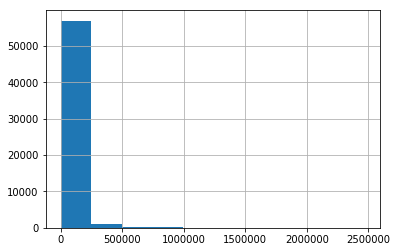

In [123]:
gene_df["lengths"].hist()

Такое себе распределение :)

## Давайте возьмём...

## логарифм

In [158]:
# можно использовать векторизованные функции NumPy
log_lengths = pd.Series(np.log10(gene_df["lengths"]))

Text(0.5,0,'Десятичный логарифм длины гена')

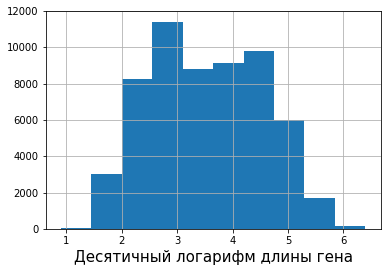

In [159]:
log_lengths.hist()
plt.xlabel("Десятичный логарифм длины гена", size=15)

## Как извлечь Ensembl IDs?

In [124]:
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute,lengths
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",2541
12,1,havana,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",15167
25,1,mirbase,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",68


In [146]:
import re
def get_id(string):
    regexp = re.compile(r"ENSG[0-9]+")
    match = regexp.search(string)
    start, end = match.start(), match.end()
    return string[start:end]

In [147]:
gene_df["ensembl_id"] = gene_df["attribute"].apply(get_id)

In [148]:
gene_df.head(3)

,seqname,source,feature,start,end,score,strand,frame,attribute,lengths,ensembl_id
0,1,havana,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",2541,ENSG00000223972
12,1,havana,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",15167,ENSG00000227232
25,1,mirbase,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",68,ENSG00000278267


## Ещё несколько полезных функций 

- gene_df.fillna(value="it was NaN") - заменяет NaNы на одно значение
- gene_df.drop_duplicates() - удаляет дубликаты
- gene_df.replace(to_replace, value) - заменяет все to_replace на value
- gene_df.sample(n) - случайно выбирает n строк из DataFrame
- gene_df.groupby(by) - группирует значения по столбцу by
- pd.merge - склеивает две таблицы по столбцу
- и ещё тысячи их

## Ключевые моменты по Pandas

- Pandas основан на NumPy: индексация, векторизация и т.д.
- Можно читать данные кучи форматов: pd.read_csv, _json, _pickle, _excel и т.д.
- Выравнивание по индексу - следите за этим
- Удобная описательная статистика и базовая визуализация
- .apply вместо векторизованных функций
- Но можно использовать функции NumPy
- Pandas огромный и очень мощный!